Please choose your ZIP file from your computer.


Saving archive.zip to archive (2).zip
Files extracted: ['Salary_dataset.csv']
Dataset Preview:
   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0

=== Actual vs Predicted Salaries ===
    Unnamed: 0  YearsExperience    Salary  PredictedSalary
0            0              1.2   39344.0     36188.158752
1            1              1.4   46206.0     38078.151217
2            2              1.6   37732.0     39968.143681
3            3              2.1   43526.0     44693.124842
4            4              2.3   39892.0     46583.117306
5            5              3.0   56643.0     53198.090931
6            6              3.1   60151.0     54143.087163
7            7              3.3   54446.0     56033.079627
8            8              3.3   64446.0     56033.079627
9            9              3.8   571

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Mean Squared Error: 31270951.72
R^2 Score: 0.96


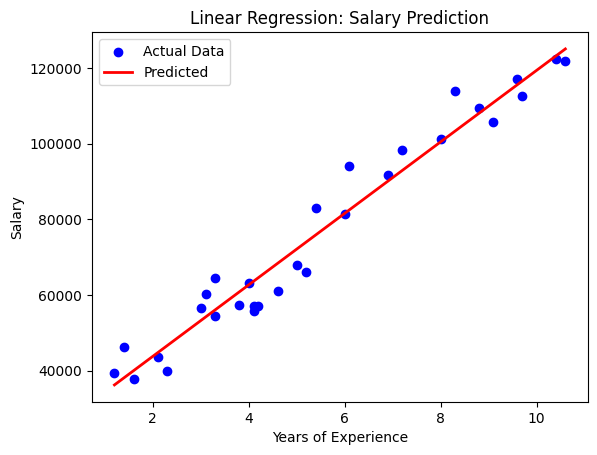


=== Confusion Matrix (Discretized Salaries) ===
        Low  Medium  High
Low       5       0     0
Medium    0      17     0
High      0       0     8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:

# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import matplotlib.pyplot as plt
from google.colab import files
import zipfile
import io
import os

# Step 2: Upload ZIP file
print("Please choose your ZIP file from your computer.")
uploaded = files.upload()

# Step 3: Extract ZIP
for fn in uploaded.keys():
    if fn.endswith('.zip'):
        with zipfile.ZipFile(io.BytesIO(uploaded[fn]), 'r') as zip_ref:
            zip_ref.extractall('dataset')
        extracted_files = os.listdir('dataset')
        print("Files extracted:", extracted_files)
        csv_files = [f for f in extracted_files if f.endswith('.csv')]
        if len(csv_files) == 0:
            raise FileNotFoundError("No CSV file found in the ZIP.")
        csv_file = 'dataset/' + csv_files[0]

# Step 4: Load CSV
df = pd.read_csv(csv_file)
print("Dataset Preview:")
print(df.head())

# Step 5: Train Linear Regression on entire dataset
X = df[['YearsExperience']]
y = df['Salary']

model = LinearRegression()
model.fit(X, y)

# Step 6: Predict on entire dataset
df['PredictedSalary'] = model.predict(X)

# Step 7: Show full table in Colab
pd.set_option('display.max_rows', None)
print("\n=== Actual vs Predicted Salaries ===")
print(df)

# Step 8: Save full CSV and Excel
df.to_csv('salary_full_predictions.csv', index=False)
df.to_excel('salary_full_predictions.xlsx', index=False)
files.download('salary_full_predictions.csv')
files.download('salary_full_predictions.xlsx')

# Step 9: Evaluation
mse = mean_squared_error(y, df['PredictedSalary'])
r2 = r2_score(y, df['PredictedSalary'])
print(f"\nMean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Step 10: Visualization
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, df['PredictedSalary'], color='red', linewidth=2, label='Predicted')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression: Salary Prediction")
plt.legend()
plt.show()

# Step 11: Optional "Confusion Matrix" (Discretized Salary)
# We divide salaries into 3 bins: Low, Medium, High
bins = [0, 50000, 100000, 200000]  # Adjust based on dataset
labels = ['Low', 'Medium', 'High']
df['ActualBin'] = pd.cut(df['Salary'], bins=bins, labels=labels)
df['PredictedBin'] = pd.cut(df['PredictedSalary'], bins=bins, labels=labels)

cm = confusion_matrix(df['ActualBin'], df['PredictedBin'], labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("\n=== Confusion Matrix (Discretized Salaries) ===")
print(cm_df)



In [11]:
from google.colab import files
files.download('salary_full_predictions.csv')
files.download('salary_full_predictions.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>